# Project - Moving Violations Issued in March 2022(Washington, DC)

In [1]:
#importing libraries

# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data set

data = pd.read_csv("Moving_Violations_Issued_in_March_2022.csv")

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Understanding the Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   OBJECTID                102927 non-null  int64  
 1   LOCATION                102927 non-null  object 
 2   XCOORD                  102346 non-null  float64
 3   YCOORD                  102346 non-null  float64
 4   ISSUE_DATE              102927 non-null  object 
 5   ISSUE_TIME              102927 non-null  int64  
 6   ISSUING_AGENCY_CODE     102927 non-null  int64  
 7   ISSUING_AGENCY_NAME     102927 non-null  object 
 8   ISSUING_AGENCY_SHORT    102927 non-null  object 
 9   VIOLATION_CODE          102927 non-null  object 
 10  VIOLATION_PROCESS_DESC  102927 non-null  object 
 11  PLATE_STATE             102927 non-null  object 
 12  ACCIDENT_INDICATOR      2945 non-null    object 
 13  DISPOSITION_CODE        102927 non-null  int64  
 14  DISPOSITION_TYPE    

In [4]:
# Loading first five rows from Dataset

data.head()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,34597548,I 395 SOUTHBOUND SW,NaN,NaN,2022/03/25 04:00:00+00,2221,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,...,0,0,0,0,0,NaN,NaN,NaN,NaN,2022/04/08 05:53:06+00
1,34597549,2330 GOOD HOPE RD SE,402270.450,133068.760,2022/03/05 05:00:00+00,1729,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,...,0,0,0,0,0,NaN,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,34597552,3001 CONN AVE NW,395285.080,140304.350,2022/03/03 05:00:00+00,1433,24,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,...,0,0,0,0,0,NaN,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,34597554,1100 19 ST NW,396207.124,137337.436,2022/03/12 05:00:00+00,36,52,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,...,0,0,0,0,0,NaN,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,34597555,746 SHERIDAN ST NW,397825.131,140429.830,2022/03/14 04:00:00+00,327,4,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,...,0,0,0,0,0,NaN,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [5]:
# Loading last five rows from Dataset

data.tail()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
102922,34756876,3700 BLK S DAKOTA AVE NE SE/B,402091.810,140837.570,2022/03/26 04:00:00+00,47,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T120,...,0,0,0,0,0,NaN,38.935,-76.976,814989.0,2022/04/08 05:53:33+00
102923,34756877,2000 BLK BRANCH AVE SE S/B,403549.610,133044.630,2022/03/26 04:00:00+00,49,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.865,-76.959,53111.0,2022/04/08 05:53:33+00
102924,34756878,3700 BLK SOUTHERN AVE SE SW/B,404133.540,132428.010,2022/03/26 04:00:00+00,51,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.860,-76.952,31943.0,2022/04/08 05:53:33+00
102925,34756879,SUITLAND PKWY W/B @ STANTON RD SE,401449.343,131721.086,2022/03/26 04:00:00+00,51,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.853,-76.983,901568.0,2022/04/08 05:53:33+00
102926,34756880,2200 BLK K ST NW W/B,395664.920,137186.890,2022/03/26 04:00:00+00,52,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T121,...,0,0,0,0,0,NaN,38.903,-77.050,805065.0,2022/04/08 05:53:33+00


In [6]:
# Dimensions of Dataset

data.shape

(102927, 29)

In [7]:
data.describe()

,OBJECTID,XCOORD,YCOORD,ISSUE_TIME,ISSUING_AGENCY_CODE,DISPOSITION_CODE,FINE_AMOUNT,TOTAL_PAID,PENALTY_1,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID
count,1.029270e+05,102346.000000,102346.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.0,102927.0,102927.0,102927.0,1.029270e+05,0.0,102346.000000,102346.000000,100769.000000
mean,3.469321e+07,399775.980838,137514.352601,1301.078871,24.474268,0.047072,109.317866,17.438136,0.071993,0.0,0.0,0.0,0.0,1.703830e+07,NaN,38.905515,-77.002590,589357.270768
std,4.626168e+04,3905.981176,4066.451301,519.739701,3.525948,1.584147,50.229566,42.066752,4.099799,0.0,0.0,0.0,0.0,1.256887e+08,NaN,0.036626,0.045038,346055.791662
min,3.459755e+07,390513.250000,128092.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.821000,-77.109000,-37627.000000
25%,3.464008e+07,397107.484000,134663.600000,958.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.880000,-77.033000,278456.000000
50%,3.470542e+07,399732.210000,137763.400000,1322.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.908000,-77.003000,805065.000000
75%,3.473115e+07,402692.750000,140837.570000,1645.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.935000,-76.969000,901787.000000
max,3.475688e+07,407514.303000,146788.570000,2359.000000,77.000000,111.000000,1000.000000,500.000000,500.000000,0.0,0.0,0.0,0.0,9.505720e+08,NaN,38.989000,-76.913000,913908.000000


# Data Cleaning

In [8]:
# Retrieving the total number of unique va;ues of each variable

data.nunique()

OBJECTID                  102927
LOCATION                    1592
XCOORD                      1069
YCOORD                      1071
ISSUE_DATE                    30
ISSUE_TIME                  1440
ISSUING_AGENCY_CODE           22
ISSUING_AGENCY_NAME           22
ISSUING_AGENCY_SHORT          22
VIOLATION_CODE               138
VIOLATION_PROCESS_DESC       138
PLATE_STATE                   44
ACCIDENT_INDICATOR             2
DISPOSITION_CODE              13
DISPOSITION_TYPE               5
DISPOSITION_DATE              16
FINE_AMOUNT                   18
TOTAL_PAID                    16
PENALTY_1                      9
PENALTY_2                      1
PENALTY_3                      1
PENALTY_4                      1
PENALTY_5                      1
RP_MULT_OWNER_NO            1536
BODY_STYLE                     0
LATITUDE                     148
LONGITUDE                    180
MAR_ID                      1074
GIS_LAST_MOD_DTTM             21
dtype: int64

In [9]:
# Dropping unwanted variables to make the data clear

new_Data = data.drop(['ISSUE_TIME','PENALTY_1','PENALTY_2','PENALTY_3','PENALTY_4','PENALTY_5','BODY_STYLE','OBJECTID','XCOORD','YCOORD','ISSUING_AGENCY_CODE','ISSUE_DATE'], axis=1)

In [10]:
new_Data.shape

(102927, 17)

In [11]:
# Checking if there are any Null values present in the first Dataset

data.isnull().sum()

OBJECTID                       0
LOCATION                       0
XCOORD                       581
YCOORD                       581
ISSUE_DATE                     0
ISSUE_TIME                     0
ISSUING_AGENCY_CODE            0
ISSUING_AGENCY_NAME            0
ISSUING_AGENCY_SHORT           0
VIOLATION_CODE                 0
VIOLATION_PROCESS_DESC         0
PLATE_STATE                    0
ACCIDENT_INDICATOR         99982
DISPOSITION_CODE               0
DISPOSITION_TYPE               0
DISPOSITION_DATE          102732
FINE_AMOUNT                    0
TOTAL_PAID                     0
PENALTY_1                      0
PENALTY_2                      0
PENALTY_3                      0
PENALTY_4                      0
PENALTY_5                      0
RP_MULT_OWNER_NO               0
BODY_STYLE                102927
LATITUDE                     581
LONGITUDE                    581
MAR_ID                      2158
GIS_LAST_MOD_DTTM              0
dtype: int64

In [12]:
# Checking if there are any Null values present in the new Dataset

new_Data.isnull().sum()

LOCATION                       0
ISSUING_AGENCY_NAME            0
ISSUING_AGENCY_SHORT           0
VIOLATION_CODE                 0
VIOLATION_PROCESS_DESC         0
PLATE_STATE                    0
ACCIDENT_INDICATOR         99982
DISPOSITION_CODE               0
DISPOSITION_TYPE               0
DISPOSITION_DATE          102732
FINE_AMOUNT                    0
TOTAL_PAID                     0
RP_MULT_OWNER_NO               0
LATITUDE                     581
LONGITUDE                    581
MAR_ID                      2158
GIS_LAST_MOD_DTTM              0
dtype: int64

In [13]:
# After viewing the values and total number of numbers the below variables are 
# dropped from the above dataset depending upon the variable's use.

new_Data = new_Data.drop(['DISPOSITION_CODE','DISPOSITION_TYPE','DISPOSITION_DATE','TOTAL_PAID','RP_MULT_OWNER_NO',], axis=1)

In [14]:
new_Data.shape

(102927, 12)

In [15]:
new_Data.head()

,LOCATION,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,I 395 SOUTHBOUND SW,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,CHANGE LANES WITHOUT CAUTION,OH,Y,100,NaN,NaN,NaN,2022/04/08 05:53:06+00
1,2330 GOOD HOPE RD SE,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,N,30,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,3001 CONN AVE NW,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,FAIL TO DISPLAY CURRENT TAGS,VA,N,100,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,1100 19 ST NW,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,VA,N,150,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,746 SHERIDAN ST NW,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE,ME,Y,25,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [16]:
new_Data.tail()

,LOCATION,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
102922,3700 BLK S DAKOTA AVE NE SE/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T120,SPEED 16-20 MPH OVER THE SPEED LIMIT,,NaN,0,38.935,-76.976,814989.0,2022/04/08 05:53:33+00
102923,2000 BLK BRANCH AVE SE S/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100,38.865,-76.959,53111.0,2022/04/08 05:53:33+00
102924,3700 BLK SOUTHERN AVE SE SW/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100,38.860,-76.952,31943.0,2022/04/08 05:53:33+00
102925,SUITLAND PKWY W/B @ STANTON RD SE,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,0,38.853,-76.983,901568.0,2022/04/08 05:53:33+00
102926,2200 BLK K ST NW W/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T121,SPEED 21-25 MPH OVER THE SPEED LIMIT,,NaN,200,38.903,-77.050,805065.0,2022/04/08 05:53:33+00


In [17]:
new_Data.isnull().sum()

LOCATION                      0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
PLATE_STATE                   0
ACCIDENT_INDICATOR        99982
FINE_AMOUNT                   0
LATITUDE                    581
LONGITUDE                   581
MAR_ID                     2158
GIS_LAST_MOD_DTTM             0
dtype: int64

In [18]:
new_Data['LATITUDE'].fillna(int(new_Data['LATITUDE'].mean()), inplace=True)
new_Data['LONGITUDE'].fillna(int(new_Data['LONGITUDE'].mean()), inplace=True)


new_Data['MAR_ID'].fillna(int(new_Data['MAR_ID'].mean()), inplace=True)

In [19]:
new_Data["ACCIDENT_INDICATOR"].unique()

array(['Y', 'N', nan], dtype=object)

In [20]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LOCATION                102927 non-null  object 
 1   ISSUING_AGENCY_NAME     102927 non-null  object 
 2   ISSUING_AGENCY_SHORT    102927 non-null  object 
 3   VIOLATION_CODE          102927 non-null  object 
 4   VIOLATION_PROCESS_DESC  102927 non-null  object 
 5   PLATE_STATE             102927 non-null  object 
 6   ACCIDENT_INDICATOR      2945 non-null    object 
 7   FINE_AMOUNT             102927 non-null  int64  
 8   LATITUDE                102927 non-null  float64
 9   LONGITUDE               102927 non-null  float64
 10  MAR_ID                  102927 non-null  float64
 11  GIS_LAST_MOD_DTTM       102927 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 9.4+ MB


# Relational Analysis

As the dataset is free from unwanted variables and data after data cleaning, the relational analysis is performed with the appropriate variables.

In [21]:
correlation = new_Data.corr()

In [22]:
correlation_1 = data.corr()

<AxesSubplot:>

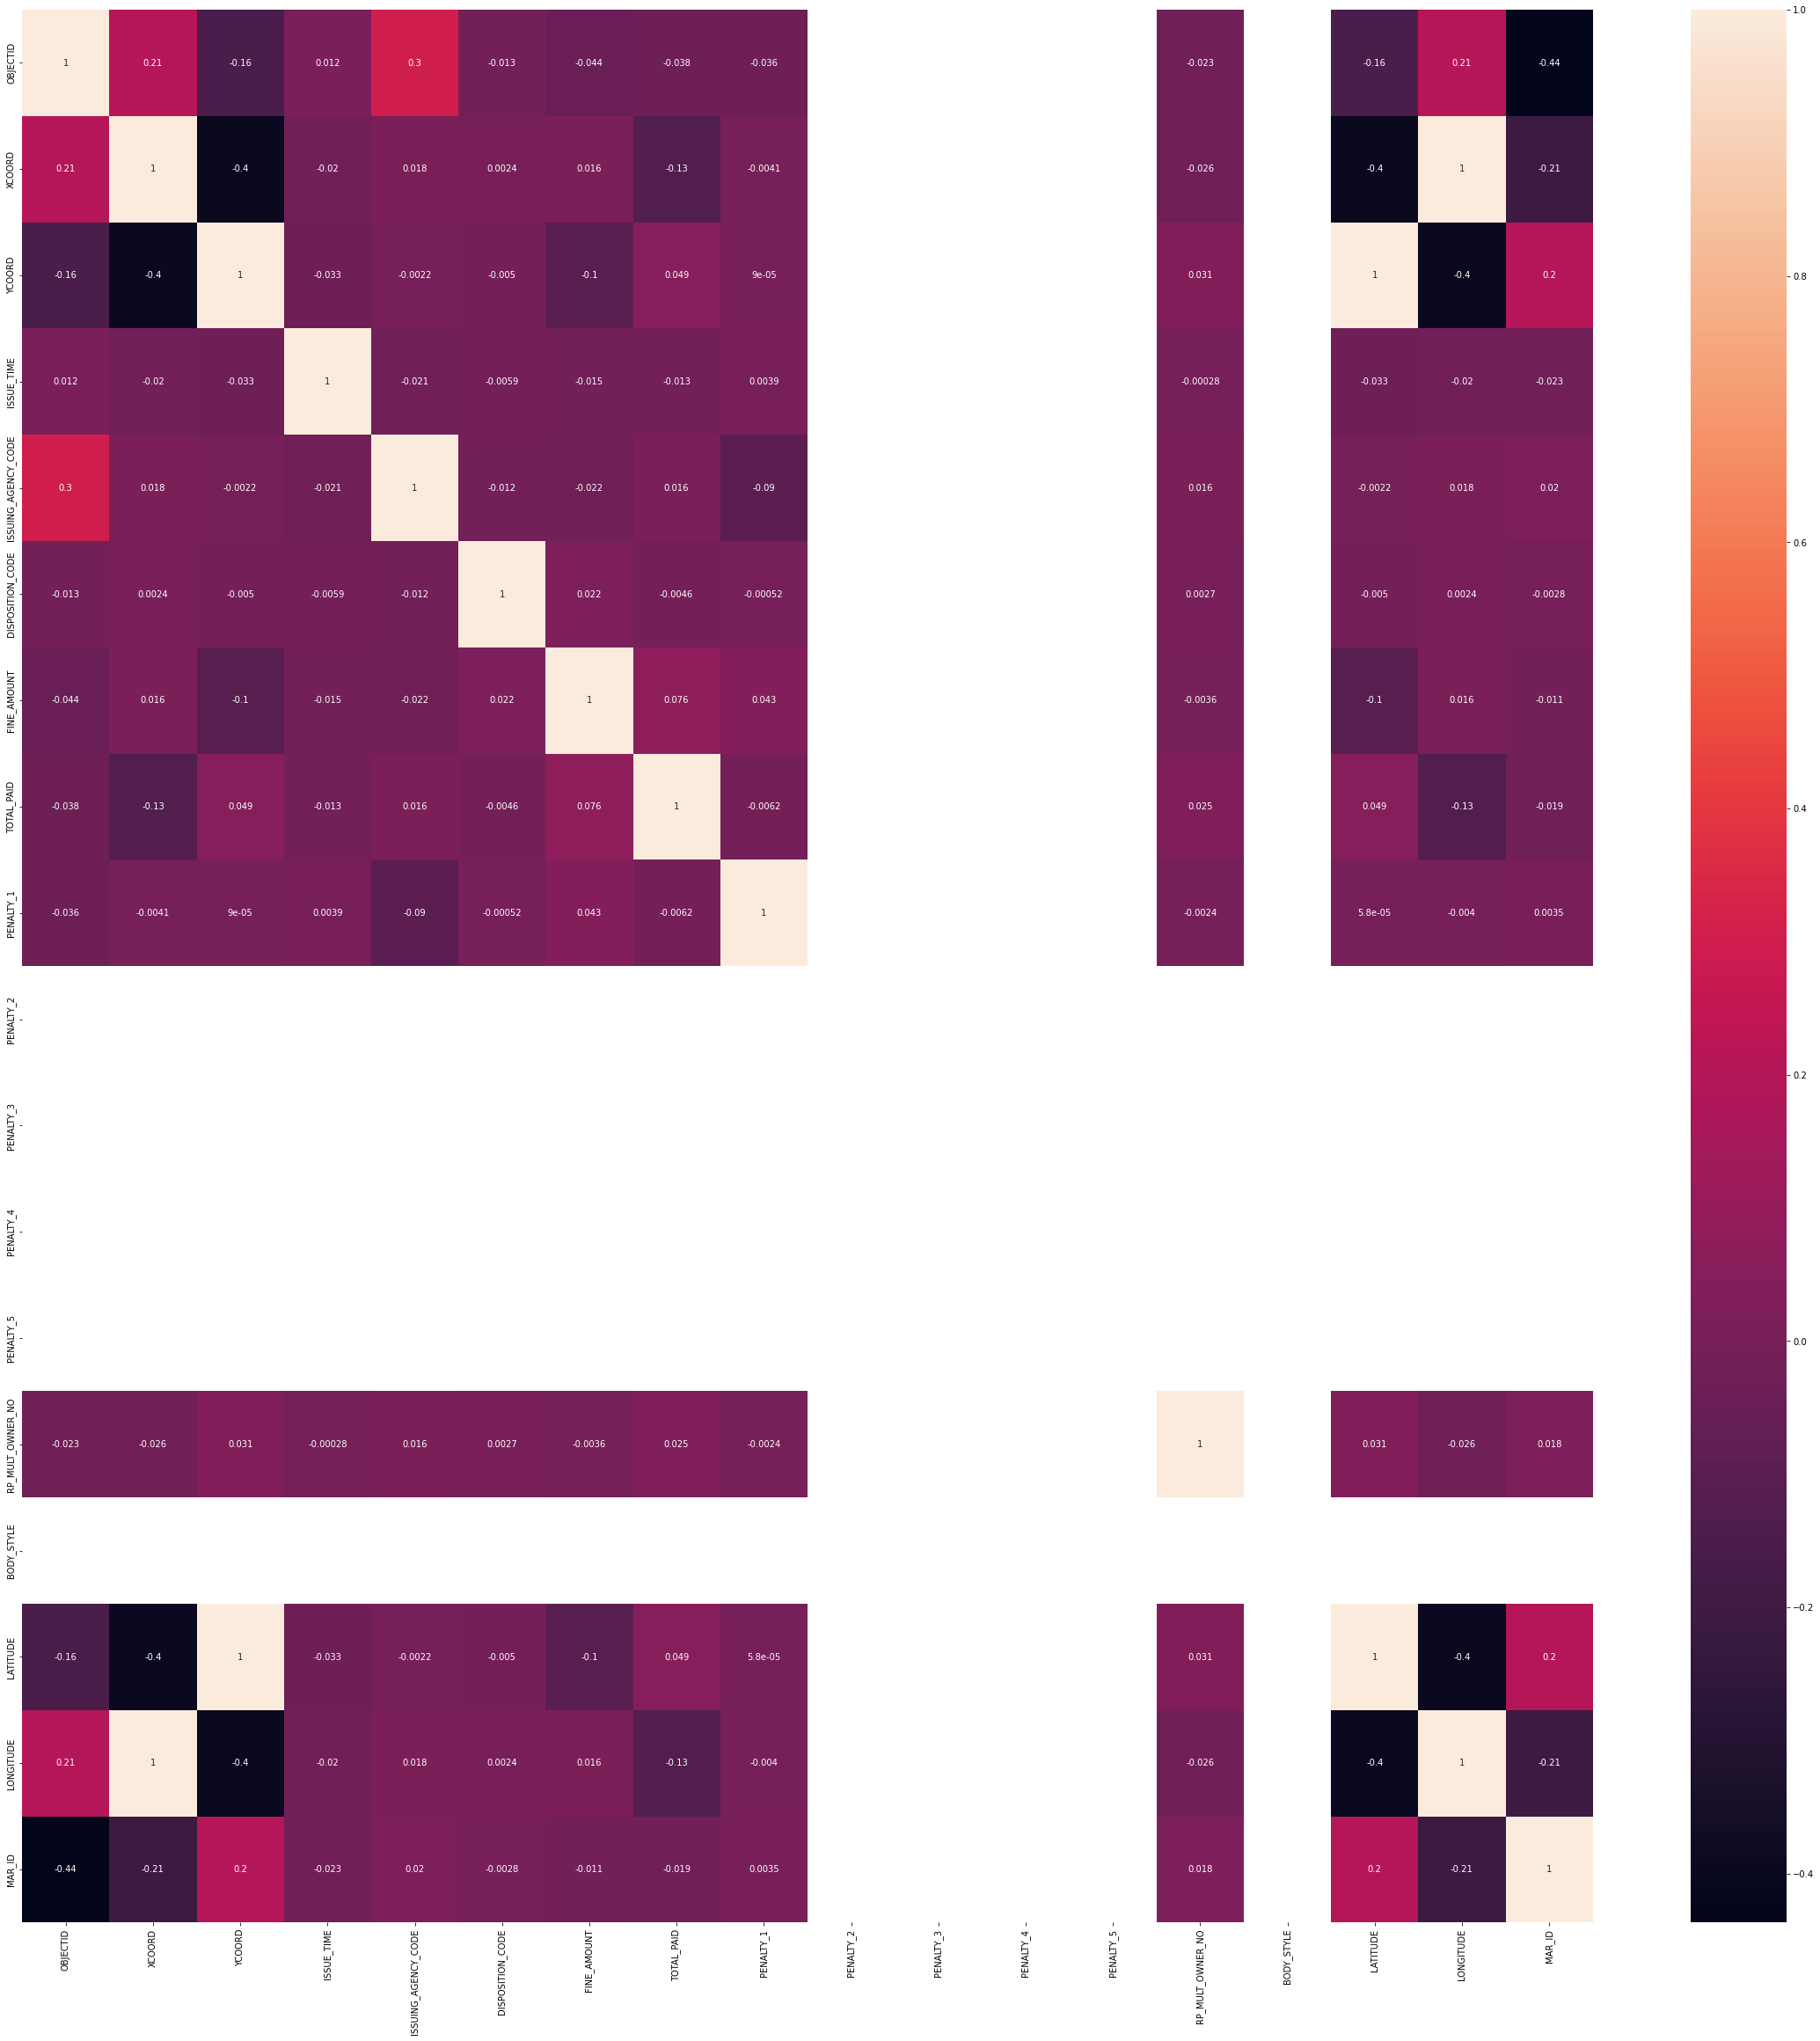

In [23]:
plt.figure(figsize=(40, 40)) 

sns.heatmap(correlation_1, xticklabels = correlation_1.columns, yticklabels = correlation_1.columns,annot=True)

<AxesSubplot:>

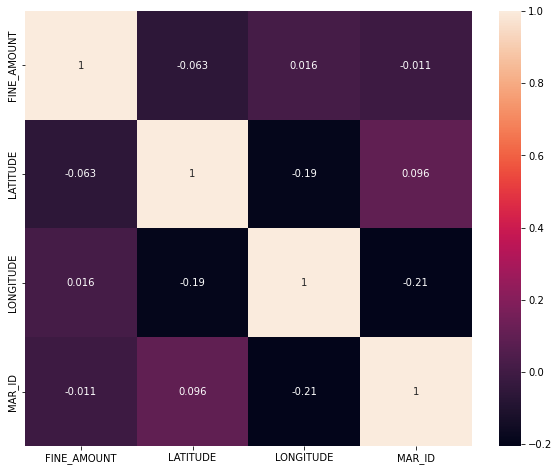

In [24]:
#implementing the Heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,annot=True)

<Figure size 4320x2880 with 0 Axes>

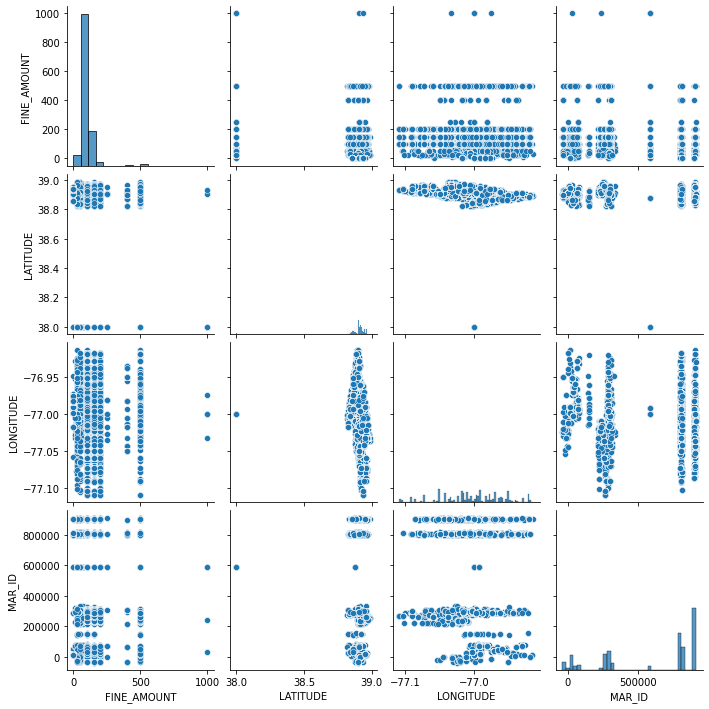

In [25]:
# Implementing the pair plot : used for two variables to determine relation
plt.figure(figsize=(60, 40)) 

sns.pairplot(new_Data)

<AxesSubplot:title={'center':'PLATE_STATE'}>

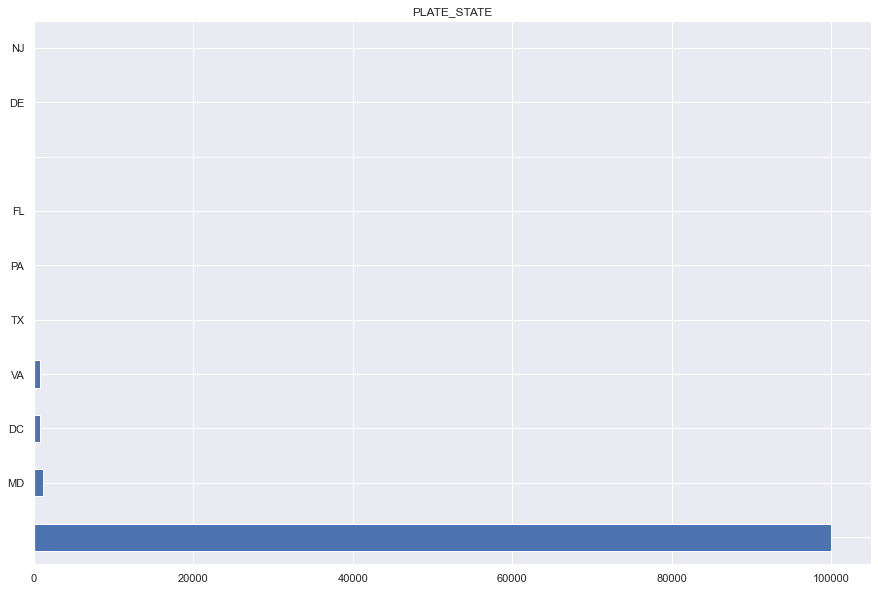

In [26]:
# Viewing the PLATE_STATE feature to look for the state vechiles with violations

sns.set(rc = {'figure.figsize':(15,10)})
plt.title("PLATE_STATE")

new_Data.PLATE_STATE.value_counts().head(10).plot(kind='barh')


array([[<AxesSubplot:title={'center':'FINE_AMOUNT'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>],
       [<AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'MAR_ID'}>]], dtype=object)

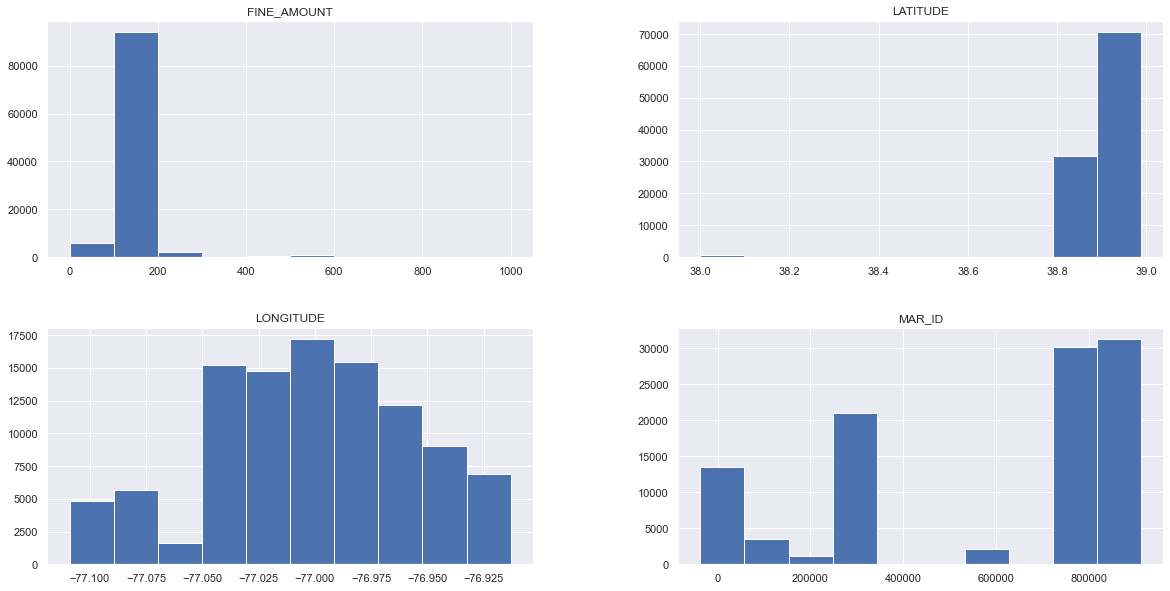

In [27]:
# Viewing the histogram of available features

new_Data.hist(figsize=(20,10))

<AxesSubplot:title={'center':'PLATE_STATE '}>

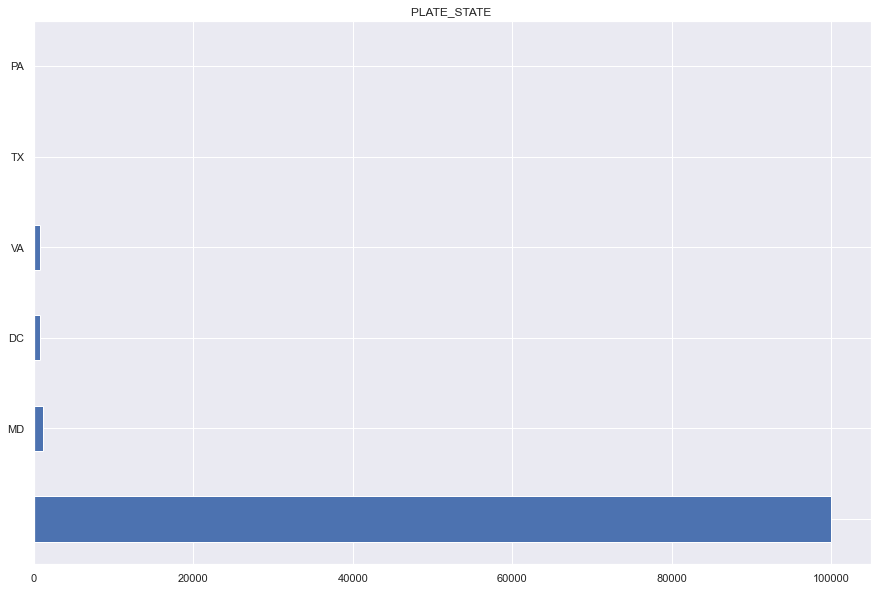

In [28]:
# Viewing the PLATE_STATE feature with bar plot 

sns.set(rc = {'figure.figsize':(15,10)})
plt.title("PLATE_STATE ")
new_Data.PLATE_STATE .value_counts().head(6).plot(kind='barh')

In [29]:
# Count of occurance of each value in the following variable

new_Data['ISSUING_AGENCY_SHORT'].value_counts()

MPD-SOD      100026
MPD-3D          623
MPD-5D          493
MPD-1D          317
MPD-2D          315
MPD-6D          314
MPD-4D          204
NO AGENCY       197
MPD-7D          112
USPP             81
USCP             74
USSS             53
DCTC             41
MPD-RC           22
MPD-OC           17
FBI              14
DIA              10
DCHA              6
FPS               4
NZP               2
MPD-PRTY          1
MPD-YD            1
Name: ISSUING_AGENCY_SHORT, dtype: int64

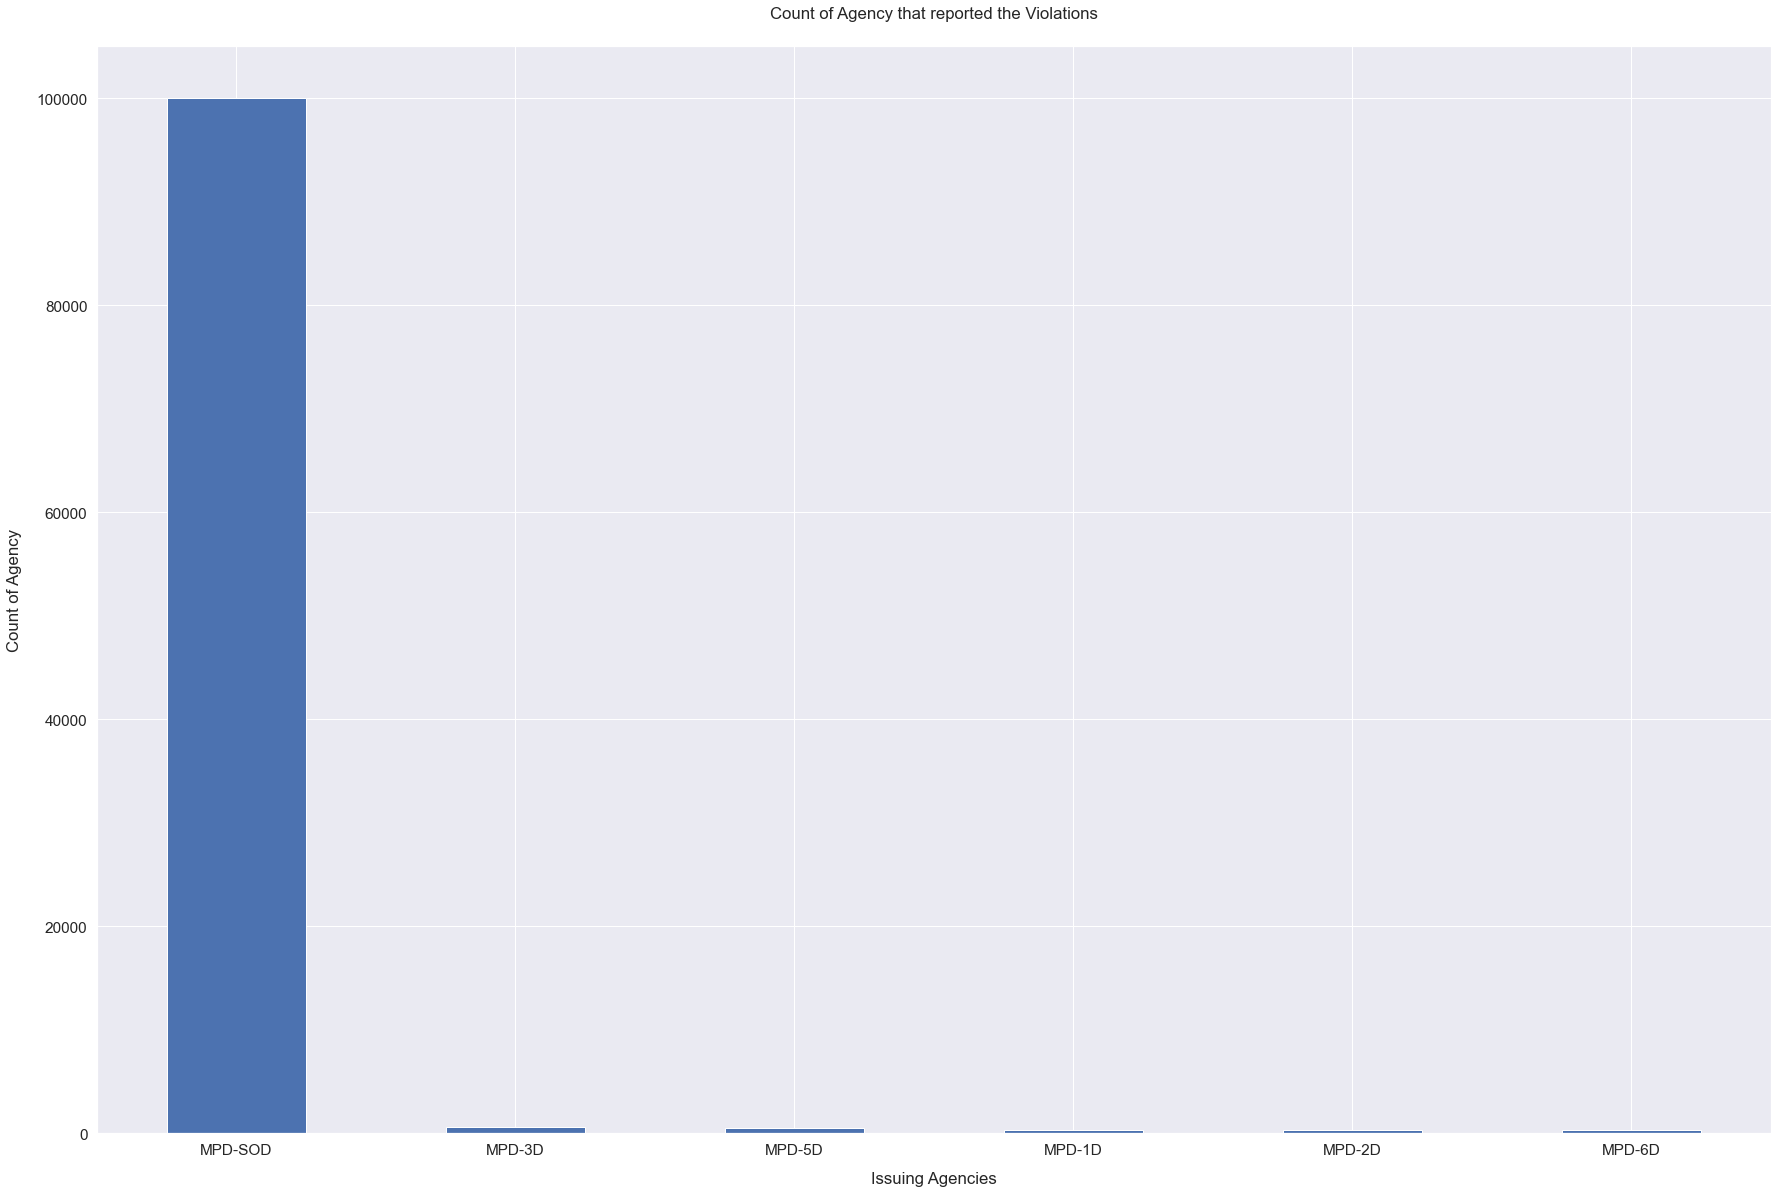

In [30]:
# Implementing the Bar graph to determine the relation between two variables with it's values and it's count of occurence

sns.set(font_scale=1.4)

new_Data['ISSUING_AGENCY_SHORT'].value_counts().head(6).plot(kind='bar', figsize=(30, 20), rot=0);

plt.xlabel("Issuing Agencies", labelpad=14)
plt.ylabel("Count of Agency", labelpad=14)
plt.title("Count of Agency that reported the Violations", y=1.02);


From the above Visuals, it can be concluded that the Agency called "MPD-SOD" has highest no occurence in the violations issued.

In [31]:
count = new_Data['ACCIDENT_INDICATOR'].value_counts()

<AxesSubplot:xlabel='Accident Indicator', ylabel='ACCIDENT_INDICATOR'>

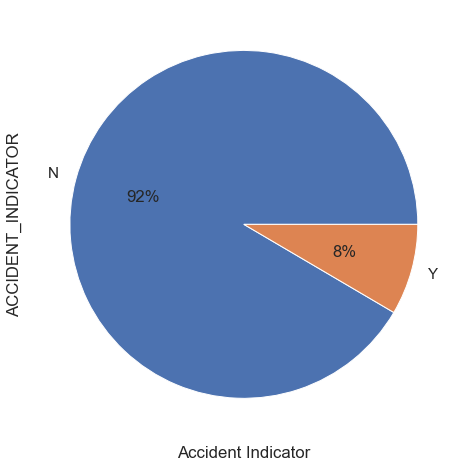

In [32]:
# Creating Pie chart to represent the percentage of accident indicator

fig = plt.figure(figsize =(10, 8))

plt.xlabel("Accident Indicator")



count.plot(kind='pie',autopct='%.0f%%')

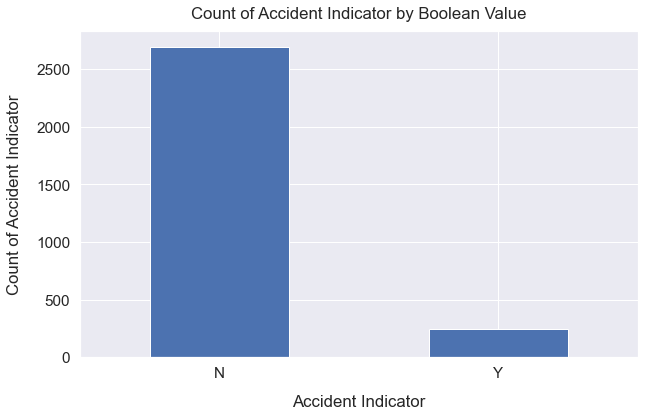

In [33]:
new_Data['ACCIDENT_INDICATOR'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0);

plt.xlabel("Accident Indicator", labelpad=14)
plt.ylabel("Count of Accident Indicator", labelpad=14)
plt.title("Count of Accident Indicator by Boolean Value", y=1.02);

From the above visuals and values, the accident indicator replicates that there are less chances of accident occurence with respective of the moving violations issued by the Agencies.

In [34]:
count_1 = new_Data['VIOLATION_PROCESS_DESC'].value_counts().head()

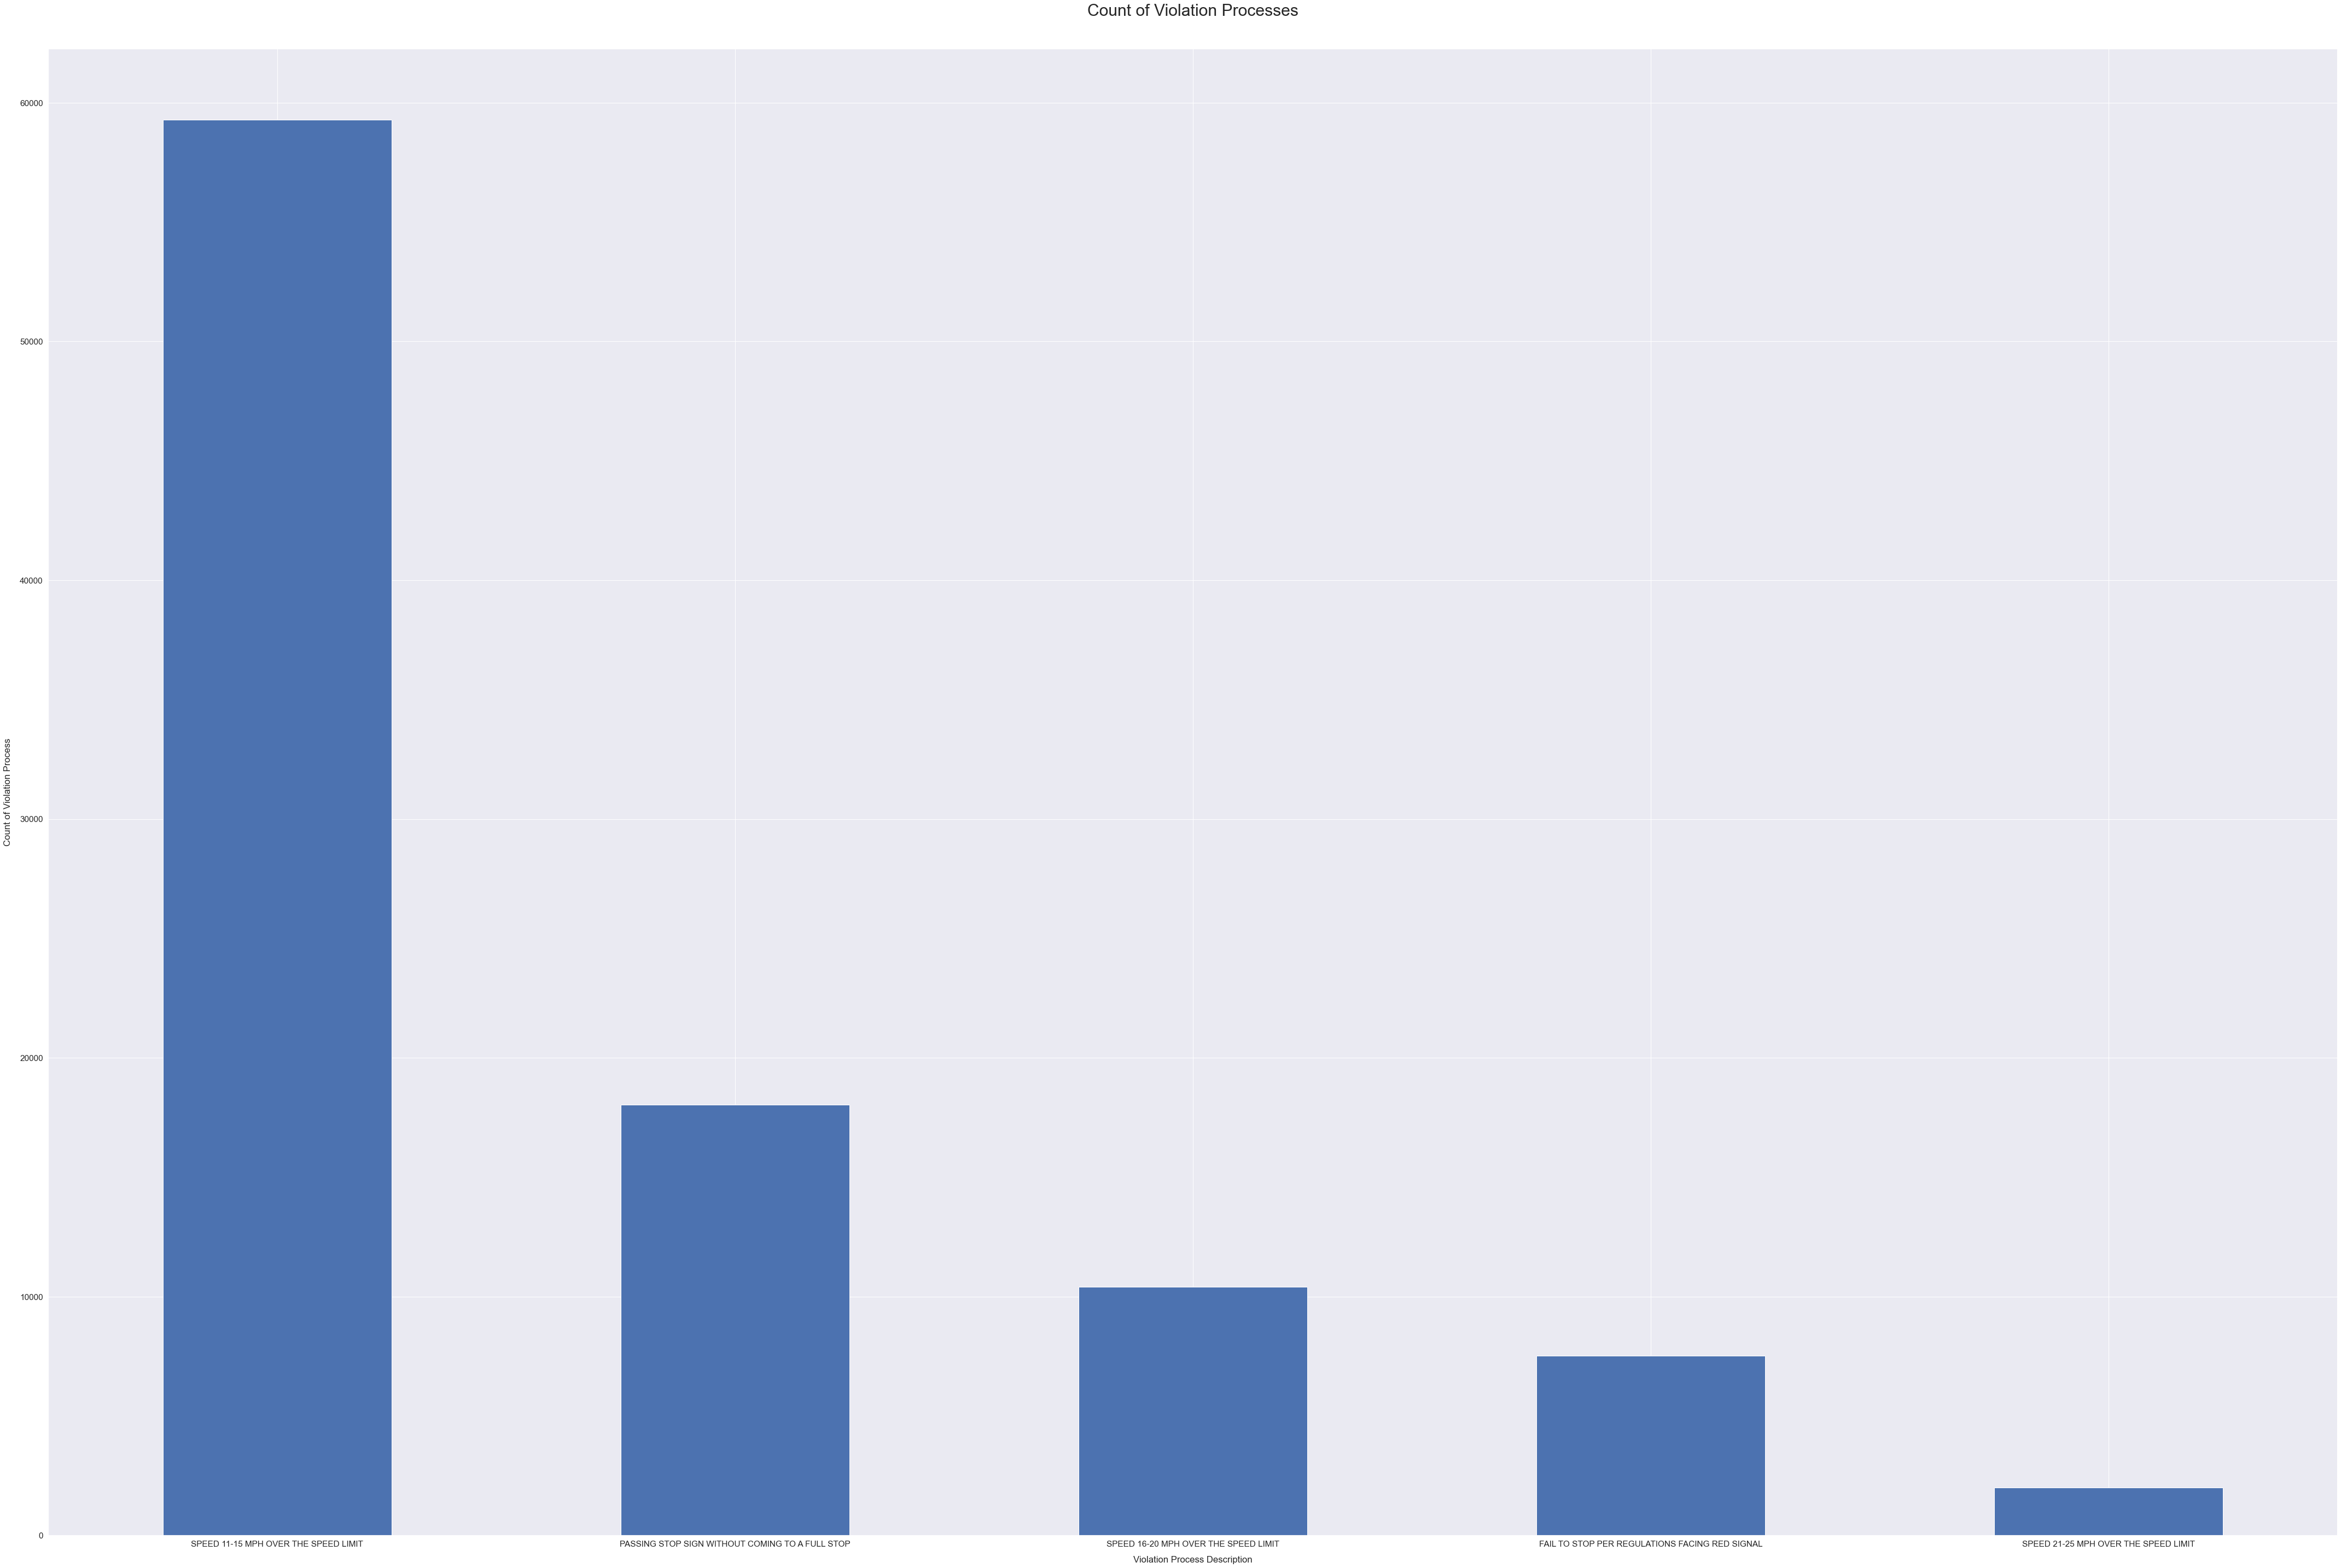

In [35]:
new_Data['VIOLATION_PROCESS_DESC'].value_counts(ascending=False).head().plot(kind='bar', figsize=(75, 50), rot=0);

sns.set(font_scale=2.5)

plt.xlabel("Violation Process Description", labelpad=14)
plt.ylabel("Count of Violation Process", labelpad=14)
plt.title("Count of Violation Processes", y=1.02);

<AxesSubplot:xlabel='Accident Indicator', ylabel='VIOLATION_PROCESS_DESC'>

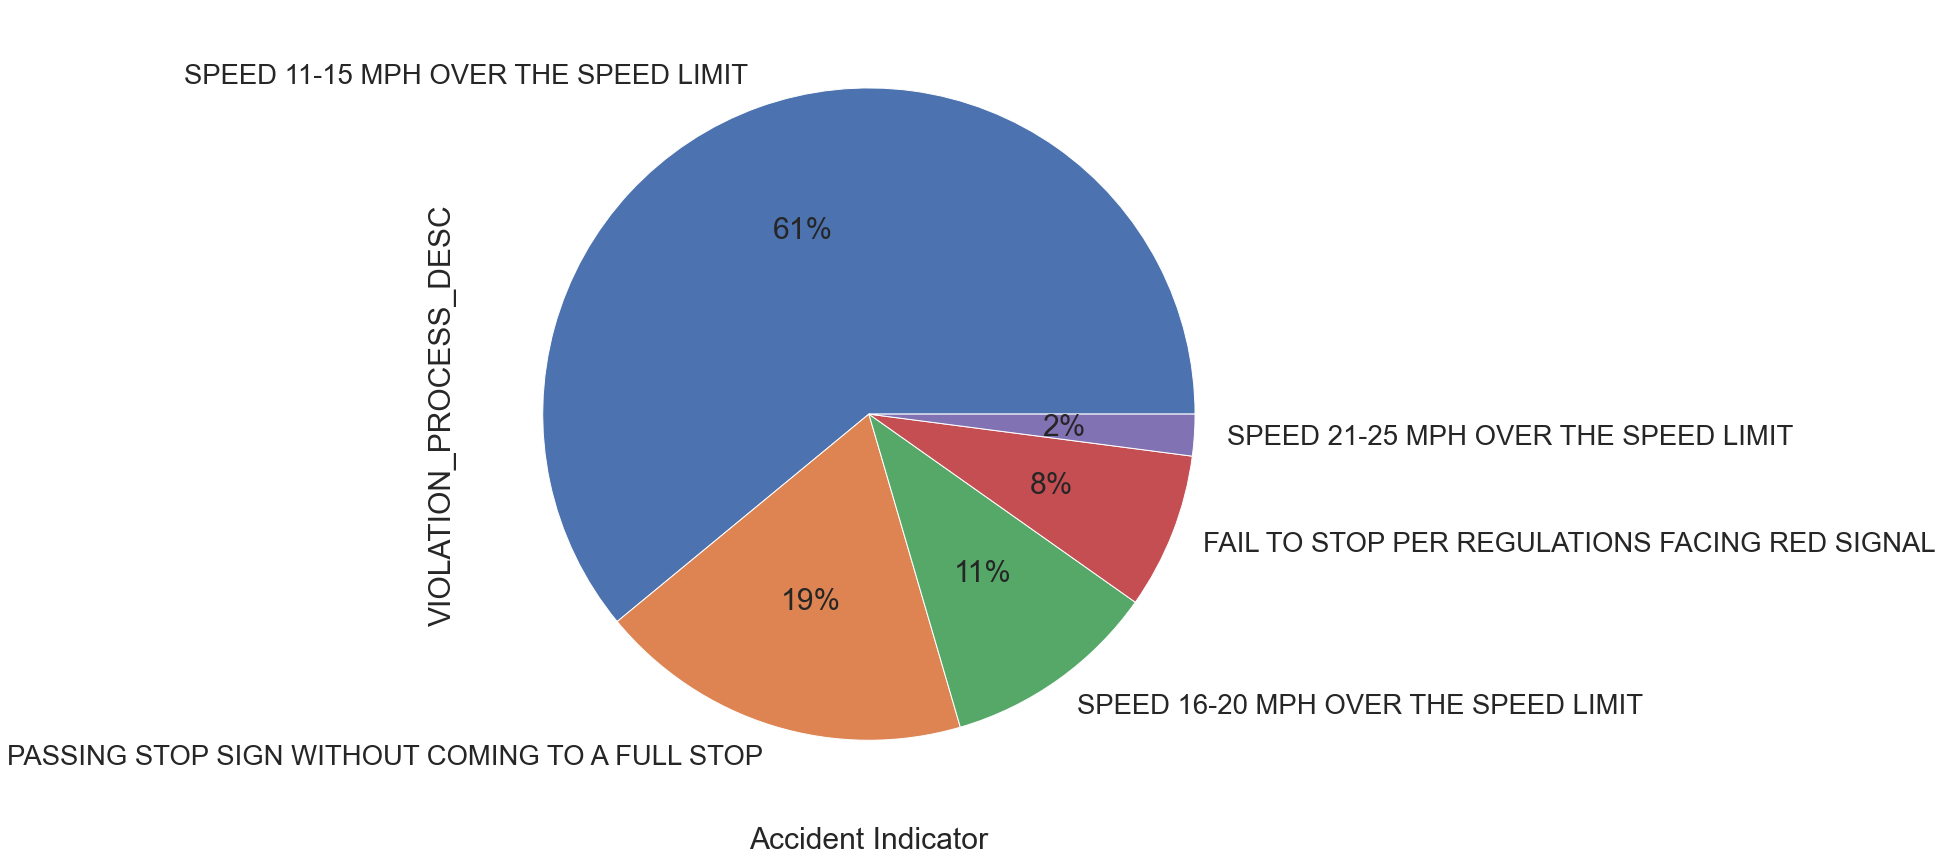

In [36]:
fig = plt.figure(figsize =(40, 15))

plt.xlabel("Accident Indicator")



count_1.plot(kind='pie',autopct='%.0f%%')

From the above visuals, it can be concluded that, the highest number of violations issued due to the "Speed 11-15 MPH Over the speed limit"

In [37]:
new_Data.head()

,LOCATION,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,I 395 SOUTHBOUND SW,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,CHANGE LANES WITHOUT CAUTION,OH,Y,100,38.000,-77.000,589357.0,2022/04/08 05:53:06+00
1,2330 GOOD HOPE RD SE,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,N,30,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,3001 CONN AVE NW,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,FAIL TO DISPLAY CURRENT TAGS,VA,N,100,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,1100 19 ST NW,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,VA,N,150,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,746 SHERIDAN ST NW,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE,ME,Y,25,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [38]:
new_Data.head()

,LOCATION,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,I 395 SOUTHBOUND SW,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,CHANGE LANES WITHOUT CAUTION,OH,Y,100,38.000,-77.000,589357.0,2022/04/08 05:53:06+00
1,2330 GOOD HOPE RD SE,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,N,30,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,3001 CONN AVE NW,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,FAIL TO DISPLAY CURRENT TAGS,VA,N,100,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,1100 19 ST NW,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,VA,N,150,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,746 SHERIDAN ST NW,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE,ME,Y,25,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [39]:
data.head()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,34597548,I 395 SOUTHBOUND SW,NaN,NaN,2022/03/25 04:00:00+00,2221,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,...,0,0,0,0,0,NaN,NaN,NaN,NaN,2022/04/08 05:53:06+00
1,34597549,2330 GOOD HOPE RD SE,402270.450,133068.760,2022/03/05 05:00:00+00,1729,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,...,0,0,0,0,0,NaN,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,34597552,3001 CONN AVE NW,395285.080,140304.350,2022/03/03 05:00:00+00,1433,24,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,...,0,0,0,0,0,NaN,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,34597554,1100 19 ST NW,396207.124,137337.436,2022/03/12 05:00:00+00,36,52,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,...,0,0,0,0,0,NaN,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,34597555,746 SHERIDAN ST NW,397825.131,140429.830,2022/03/14 04:00:00+00,327,4,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,...,0,0,0,0,0,NaN,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [40]:
new_Data['VIOLATION_PROCESS_DESC'].unique()

array(['CHANGE LANES WITHOUT CAUTION',
       'FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE',
       'FAIL TO DISPLAY CURRENT TAGS',
       'FAIL TO STOP PER REGULATIONS FACING RED SIGNAL',
       'FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE',
       'FAIL TO KEEP IN LANE', 'BUS LANE, UNAUTHRIZED DRIVING IN A',
       'DEAD OR EXPIRED TAGS', 'FAIL TO PROPERLY FASTEN TAGS TO VEHICLE',
       'NO FRONT TAGS', 'FAIL TO HAVE LICENSE',
       'OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH',
       'BIKE/PMD FAIL YIELD ROW TO PED SIDEWALK/CROSSWALK',
       'PASSING STOP SIGN WITHOUT COMING TO A FULL STOP',
       'UNREGISTERED VEHICLE, MORE THAN 30 DAYS', 'COVERED LICENSE PLATE',
       'UNREGISTERED VEHICLE 30 DAYS OR LESS',
       'FAIL TO GIVE HAND OR MECHANICAL TURN SIGNAL', 'DRIVE OVER MEDIAN',
       'TURNING LEFT WHERE LEFT TURNS ARE PROHIBITED',
       'VIOLATION OF TINTED WINDOWS REGULATIONS', 'NO STOP LIGHT(S)',
       'UNSAFE TIRE(S)', 'IMPROPER TURN', 'BACK UP WITHOUT CAUTI

In [41]:
new_Data['ACCIDENT_INDICATOR'].nunique()


2

In [42]:
fin_Data = new_Data
fin_Data

,LOCATION,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,FINE_AMOUNT,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,I 395 SOUTHBOUND SW,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,CHANGE LANES WITHOUT CAUTION,OH,Y,100,38.000,-77.000,589357.0,2022/04/08 05:53:06+00
1,2330 GOOD HOPE RD SE,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,N,30,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,3001 CONN AVE NW,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,FAIL TO DISPLAY CURRENT TAGS,VA,N,100,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,1100 19 ST NW,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,VA,N,150,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,746 SHERIDAN ST NW,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE,ME,Y,25,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00
...,...,...,...,...,...,...,...,...,...,...,...,...
102922,3700 BLK S DAKOTA AVE NE SE/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T120,SPEED 16-20 MPH OVER THE SPEED LIMIT,,NaN,0,38.935,-76.976,814989.0,2022/04/08 05:53:33+00
102923,2000 BLK BRANCH AVE SE S/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100,38.865,-76.959,53111.0,2022/04/08 05:53:33+00
102924,3700 BLK SOUTHERN AVE SE SW/B,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,100,38.860,-76.952,31943.0,2022/04/08 05:53:33+00
102925,SUITLAND PKWY W/B @ STANTON RD SE,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,0,38.853,-76.983,901568.0,2022/04/08 05:53:33+00


In [43]:
fin_Data[['ACCIDENT_INDICATOR']] = new_Data[['ACCIDENT_INDICATOR']].fillna('N')

In [44]:
fin_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LOCATION                102927 non-null  object 
 1   ISSUING_AGENCY_NAME     102927 non-null  object 
 2   ISSUING_AGENCY_SHORT    102927 non-null  object 
 3   VIOLATION_CODE          102927 non-null  object 
 4   VIOLATION_PROCESS_DESC  102927 non-null  object 
 5   PLATE_STATE             102927 non-null  object 
 6   ACCIDENT_INDICATOR      102927 non-null  object 
 7   FINE_AMOUNT             102927 non-null  int64  
 8   LATITUDE                102927 non-null  float64
 9   LONGITUDE               102927 non-null  float64
 10  MAR_ID                  102927 non-null  float64
 11  GIS_LAST_MOD_DTTM       102927 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 9.4+ MB


In [45]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = fin_Data['ACCIDENT_INDICATOR']
    X = fin_Data[[x for x in new_Data.columns if x != 'ACCIDENT_INDICATOR']]

    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 82,341
Test examples: 20,586


In [46]:
#Defining the all numerical values

numerical_list = list(fin_Data.select_dtypes(exclude=['object']).columns)
numerical_list

['FINE_AMOUNT', 'LATITUDE', 'LONGITUDE', 'MAR_ID']

In [47]:
# Dropping  columns from numerical list

fin_Data = fin_Data.drop(['LATITUDE','LONGITUDE'], axis=1)

In [48]:
# numerical values afteer dropping the above columns

numerical_list = list(fin_Data.select_dtypes(exclude=['object']).columns)
numerical_list

['FINE_AMOUNT', 'MAR_ID']

In [49]:
#Defining the all categorical values

cat_list = list(fin_Data.select_dtypes(include=['object']).columns)
cat_list

['LOCATION',
 'ISSUING_AGENCY_NAME',
 'ISSUING_AGENCY_SHORT',
 'VIOLATION_CODE',
 'VIOLATION_PROCESS_DESC',
 'PLATE_STATE',
 'ACCIDENT_INDICATOR',
 'GIS_LAST_MOD_DTTM']

In [50]:
#Dropping the unwanted features from categorical list

fin_Data = fin_Data.drop(['GIS_LAST_MOD_DTTM','ISSUING_AGENCY_SHORT','PLATE_STATE'], axis=1)

In [51]:
# Defining the all categorical values after dropping the above columns

cat_list = list(fin_Data.select_dtypes(include=['object']).columns)
cat_list

['LOCATION',
 'ISSUING_AGENCY_NAME',
 'VIOLATION_CODE',
 'VIOLATION_PROCESS_DESC',
 'ACCIDENT_INDICATOR']

### Modelling of Data

In [52]:
# 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['LOCATION', 'ISSUING_AGENCY_NAME', 'VIOLATION_CODE', 'VIOLATION_PROCESS_DESC'
            ]

num_vars = ['FINE_AMOUNT','MAR_ID']

numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline,num_vars),
                                                      ('create_dummies', cat_pipeline,cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['FINE_AMOUNT', 'MAR_ID']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['LOCATION', 'ISSUING_AGENCY_NAME',
                                  'VIOLATION_CODE',
                

In [53]:
fin_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LOCATION                102927 non-null  object 
 1   ISSUING_AGENCY_NAME     102927 non-null  object 
 2   VIOLATION_CODE          102927 non-null  object 
 3   VIOLATION_PROCESS_DESC  102927 non-null  object 
 4   ACCIDENT_INDICATOR      102927 non-null  object 
 5   FINE_AMOUNT             102927 non-null  int64  
 6   MAR_ID                  102927 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82341 entries, 31781 to 30410
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LOCATION                82341 non-null  object 
 1   ISSUING_AGENCY_NAME     82341 non-null  object 
 2   ISSUING_AGENCY_SHORT    82341 non-null  object 
 3   VIOLATION_CODE          82341 non-null  object 
 4   VIOLATION_PROCESS_DESC  82341 non-null  object 
 5   PLATE_STATE             82341 non-null  object 
 6   FINE_AMOUNT             82341 non-null  int64  
 7   LATITUDE                82341 non-null  float64
 8   LONGITUDE               82341 non-null  float64
 9   MAR_ID                  82341 non-null  float64
 10  GIS_LAST_MOD_DTTM       82341 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.5+ MB


### Logistic Regression

In [55]:


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

Logistic_Regression_Model_Pipeline_1 = Pipeline([('processing_pipeline',processing_pipeline),
                                     ('model', LogisticRegression(max_iter=1000))])

params = [{'model__C':[0.1,0.3,0.5,1.0,5], 'model__penalty': ['l2']},{'model__penalty':['none']}]
Logistic_regression_model_1 = GridSearchCV(Logistic_Regression_Model_Pipeline_1,param_grid=params,cv=5,scoring='accuracy')
Logistic_regression_model_1 = Logistic_regression_model_1.fit(X_train,y_train)
Logistic_regression_model_1.best_params_





C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will

{'model__C': 5, 'model__penalty': 'l2'}

In [56]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_hat))

Logistic_regression_model_1.best_estimator_.predict(X_test)


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [57]:
Logistic_regression_model_1.score(X_train, y_train)

0.999647806074738

In [58]:
Logistic_regression_model_1.score(X_test, y_test)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.998056931895463

Based on the above values, the score shows that dataset overfits very slightly.

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


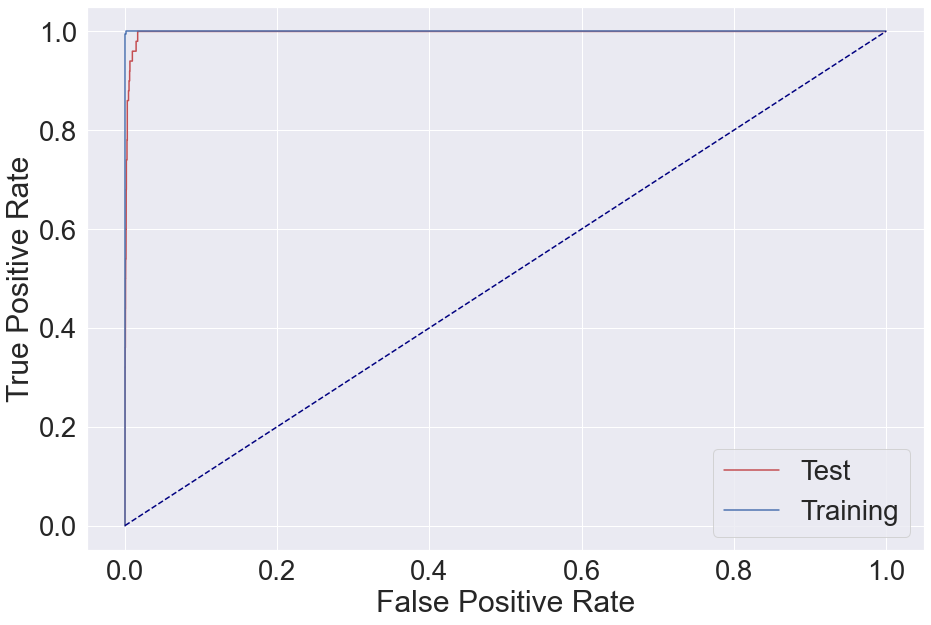

In [59]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=Logistic_regression_model_1.best_estimator_):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='Y')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.997900759641605

### The above Roc score shows the accuracy of the model. 